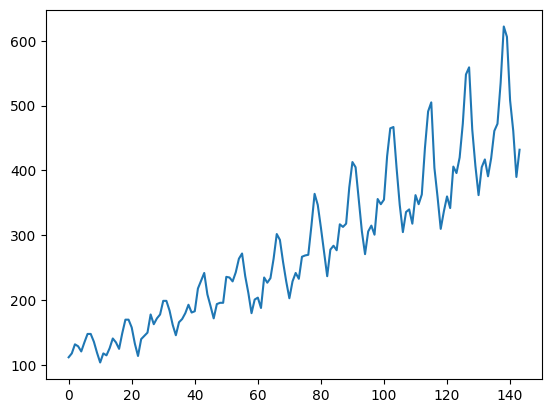

In [1]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('/content/airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [4]:
# load the dataset
dataframe = pandas.read_csv('/content/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [5]:
 #normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [8]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [11]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 4s - loss: 0.0453 - 4s/epoch - 42ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0249 - 176ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0181 - 165ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0159 - 163ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0149 - 168ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0140 - 155ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0130 - 191ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0118 - 265ms/epoch - 3ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0106 - 234ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0092 - 234ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0080 - 234ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0068 - 273ms/epoch - 3ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0055 - 255ms/epoch - 3ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0044 - 248ms/epoch - 3ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0036 - 251ms/epoch - 3ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0030 - 286ms/epoc

In [13]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 12ms/step
Train Score: 23.07 RMSE
Test Score: 49.36 RMSE


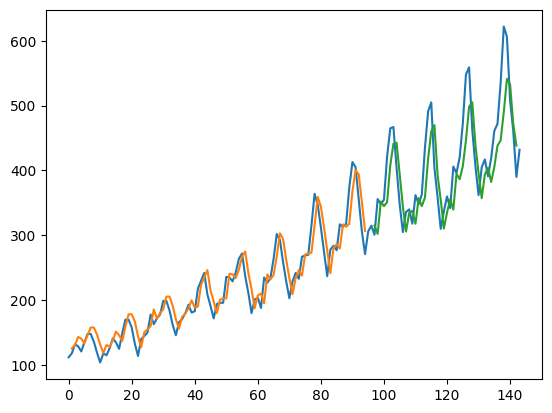

In [14]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100
92/92 - 3s - loss: 0.0626 - 3s/epoch - 28ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0263 - 249ms/epoch - 3ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0179 - 263ms/epoch - 3ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0153 - 266ms/epoch - 3ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0135 - 273ms/epoch - 3ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0120 - 240ms/epoch - 3ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0107 - 251ms/epoch - 3ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0095 - 270ms/epoch - 3ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0084 - 304ms/epoch - 3ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0076 - 231ms/epoch - 3ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0069 - 169ms/epoch - 2ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0063 - 173ms/epoch - 2ms/step
Epoch 13/100
92/92 - 0s - loss: 0.0059 - 193ms/epoch - 2ms/step
Epoch 14/100
92/92 - 0s - loss: 0.0056 - 211ms/epoch - 2ms/step
Epoch 15/100
92/92 - 0s - loss: 0.0052 - 172ms/epoch - 2ms/step
Epoch 16/100
92/92 - 0s - loss: 0.0052 - 179ms/epoc

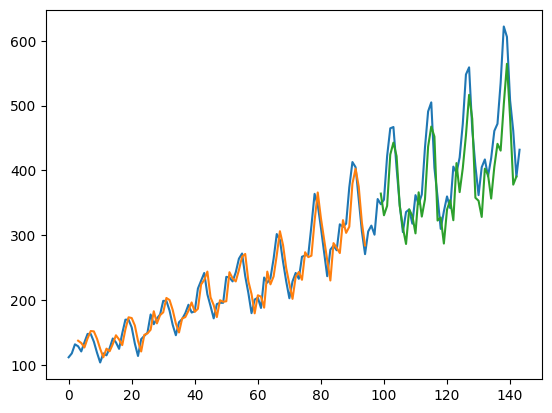

In [15]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('/content/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()